The first step is to import all the necessary libraries

1) numpy: To work with arrays

2) pandas: To work with csv files and dataframes

3) matplotlib: To create charts using pyplot, define parameters using rcParams and color them with cm.rainbow

4) warnings: To ignore all warnings which might be showing up in the notebook due to past/future depreciation of a feature

5) train_test_split: To split the dataset into training and testing data

6) StandardScaler: To scale all the features, so that the Machine Learning model better adapts to the dataset.

Import all the necessary Machine Learning algorithms.

In [1]:
#impotring necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Using the pandas read_csv function to read the dataset specify the location of the dataset and import them.After importing the dataset print the dataset.

In [2]:
#load the heart price prediction dataset
dataset = pd.read_csv("C:\ML and AI notes\heart_disease_predictor (1).csv")

In [3]:
#printing the dataset
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0.0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0.0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2.0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1.0,3,0




Here the count of 0's and 1's in the target column is printed

In [4]:
#printing the count of target column 
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In the next block the complete information of the dataset is printed

In [5]:
#brief information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        302 non-null    float64
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 33.3 KB


Here the number of unique values in each columns is calculated and printed

In [6]:
#print number of unique values per column
dataset.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Here the number of null values in each columns are calculated

In [7]:
#checking null values in the dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
target      0
dtype: int64

From the above results it is seen that the 'ca' column is having 1 null value.Hence it is filled with the most occuring data (mode) in the 'ca' column

In [8]:
#handling missing data in ca
dataset['ca'] = dataset['ca'].fillna(dataset['ca'].mode())

Here the complete description like count , mean , standard deviation , minimum , quartile ranges , maximum values are calculated

In [9]:
#complete desciption of the dataset
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.721854,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.015880,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here the skewness of the dataset is calculated using skew() function

In [10]:
#checking skewness of the dataset
dataset.skew(axis=0,skipna=True)

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.326101
thal       -0.476722
target     -0.179821
dtype: float64

Here pairplot for complete dataset is printed using pairplot() function

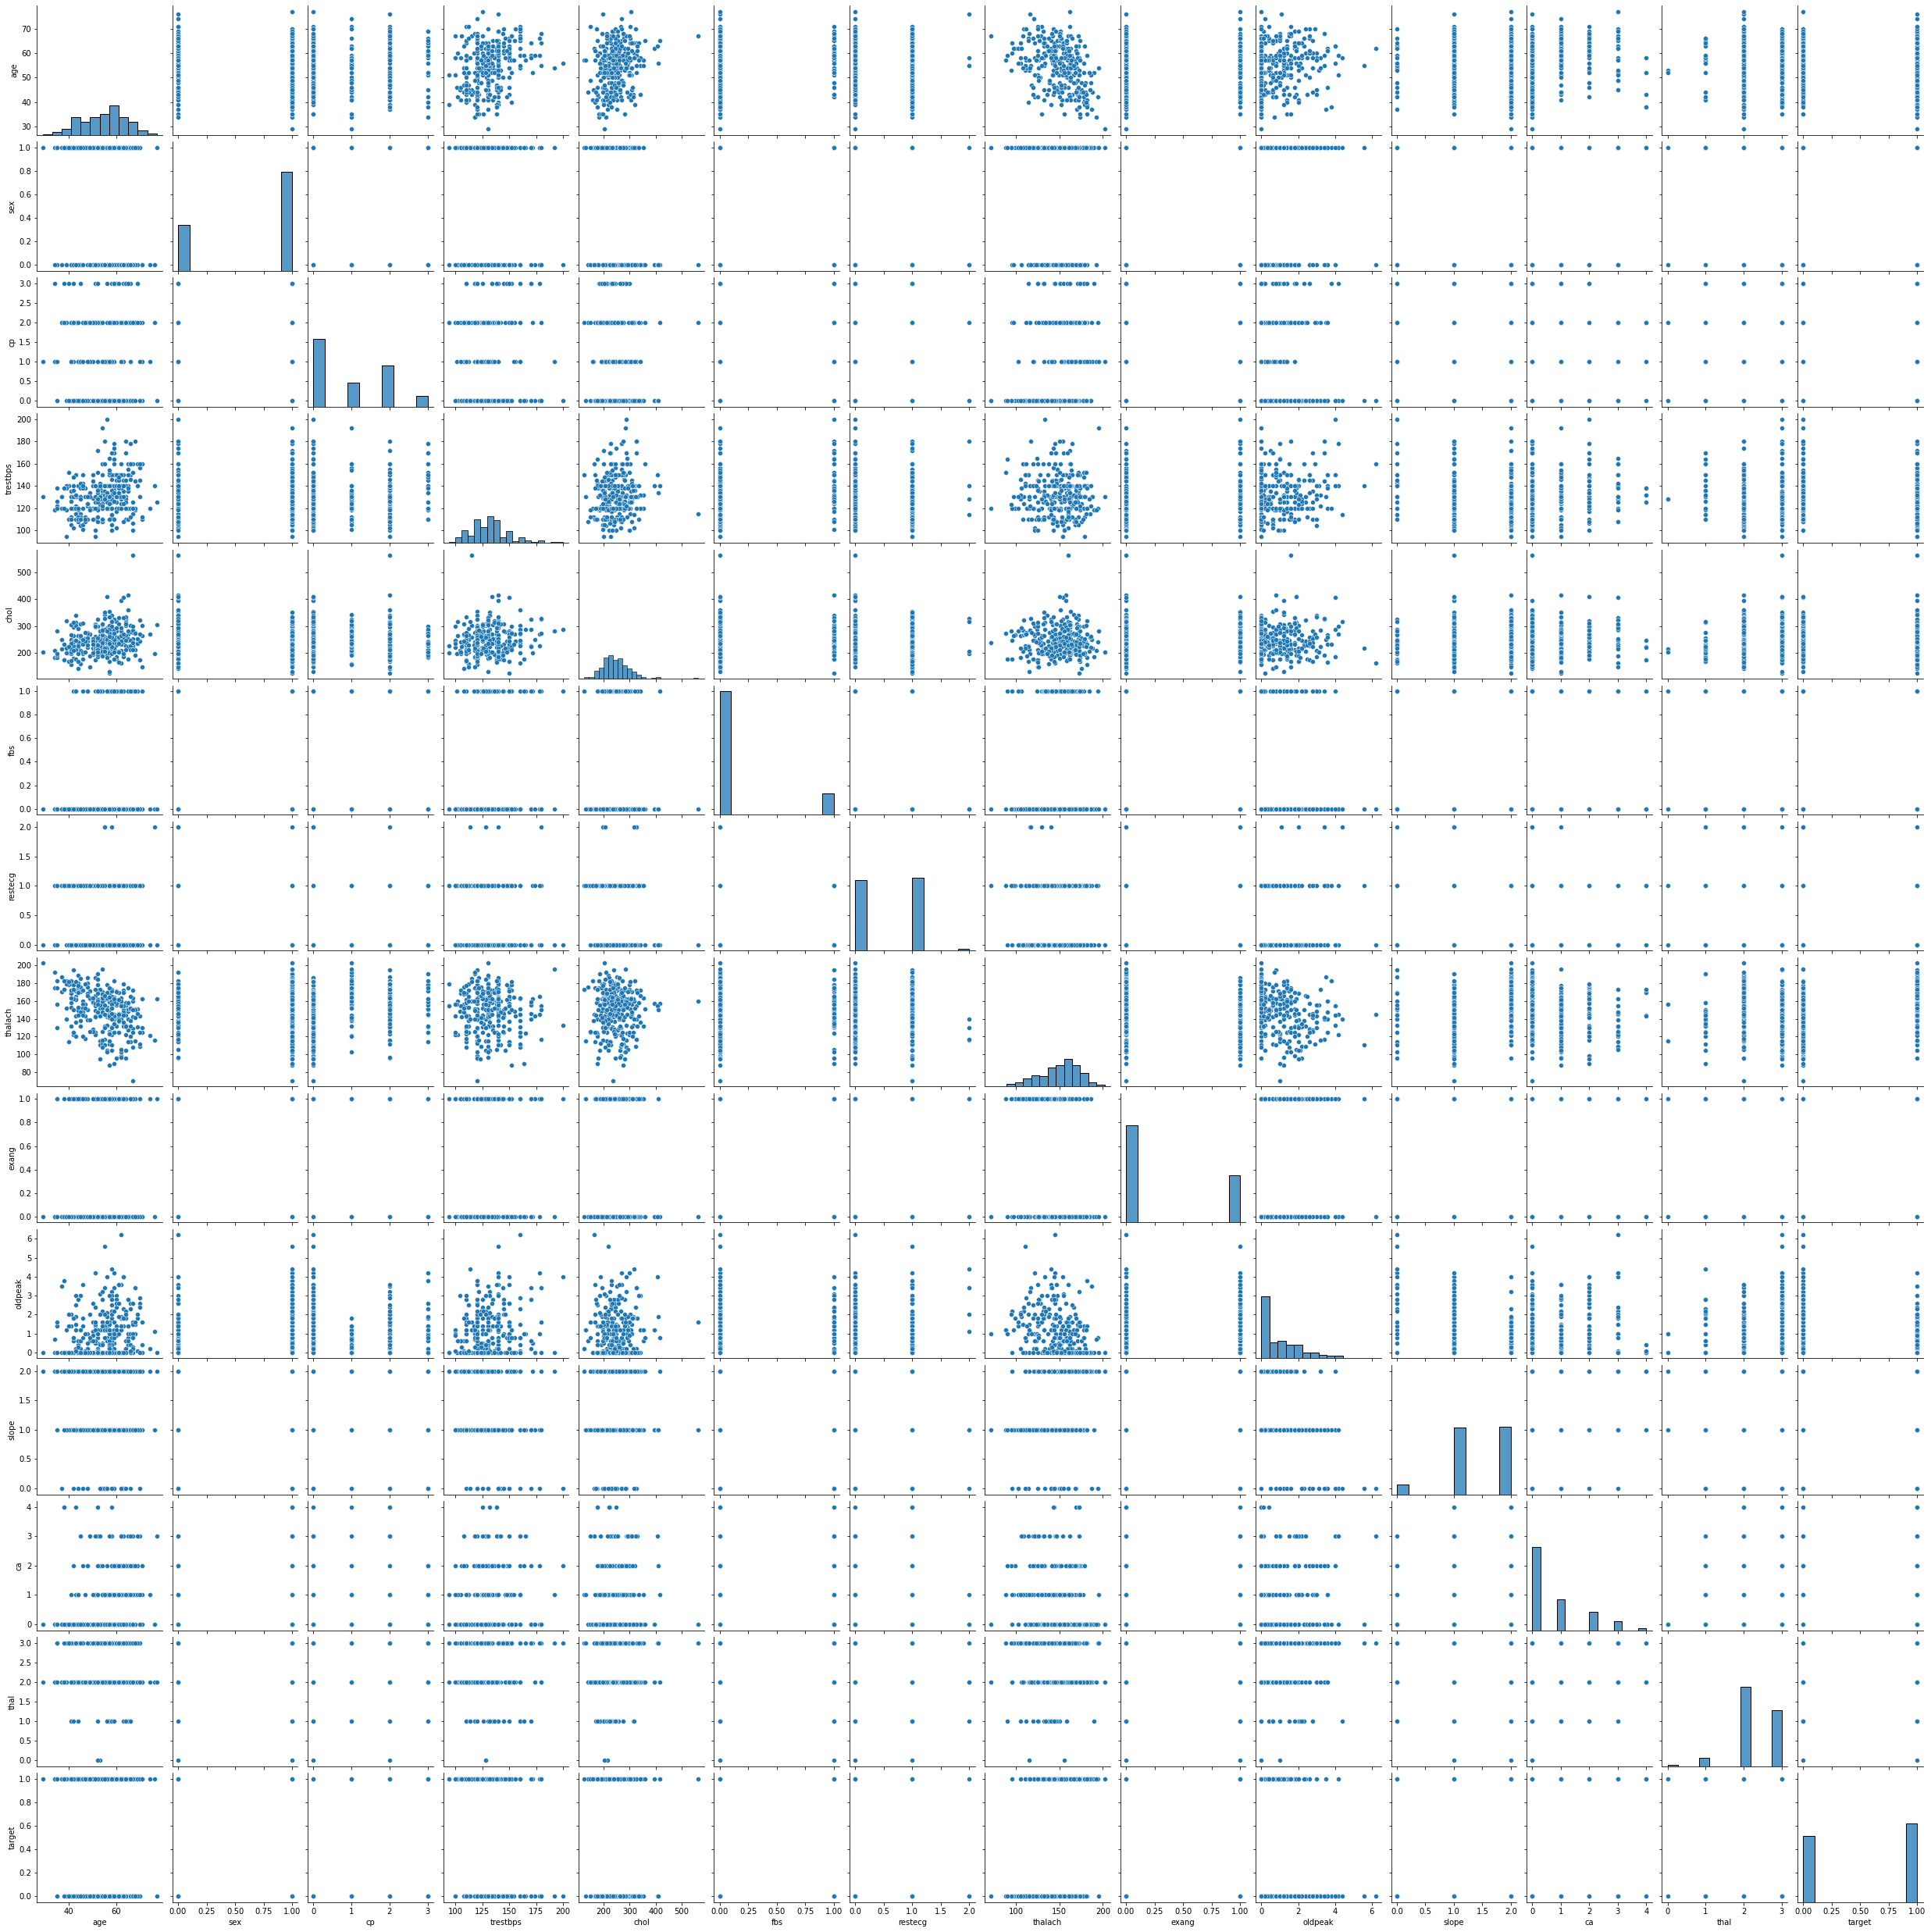

In [11]:
#pairplot for complete dataset
sns.pairplot(dataset)

Here a scatter plot for age vs target is printed

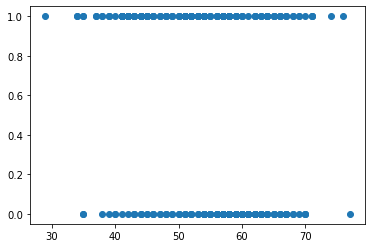

In [12]:
#scatter plot of age and target
plt.scatter(dataset.age,dataset.target)

Here a Histogram for all columns in plotted.
It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling. Next, wherever you see discrete bars, it basically means that each of these is actually a categorical variable. We will need to handle these categorical variables before applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.

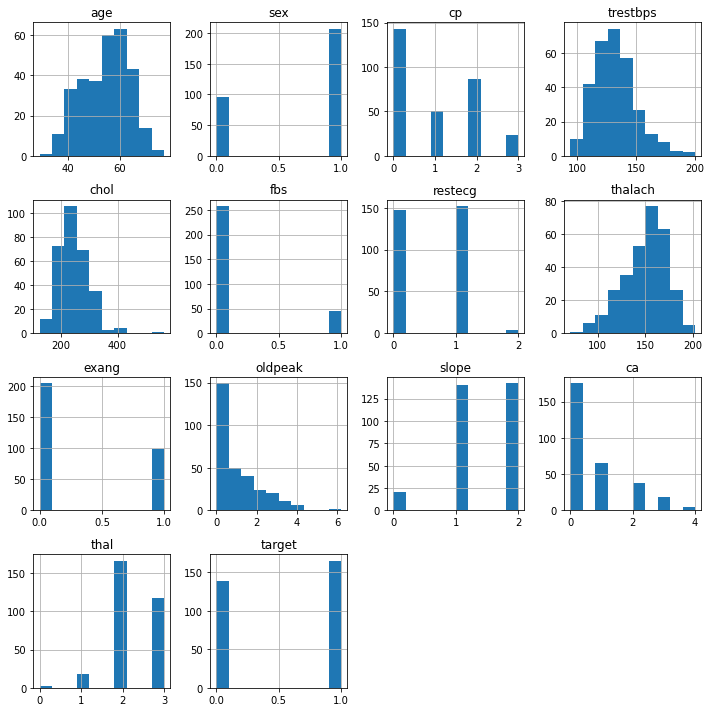

In [13]:
#histogram for the dataset
rcParams['figure.figsize'] = 10,10
dataset.hist()
plt.tight_layout()

Here a correlation between the features is analysed through a heat map.This tells us which feature is negatively correlated and which is positively correlated.

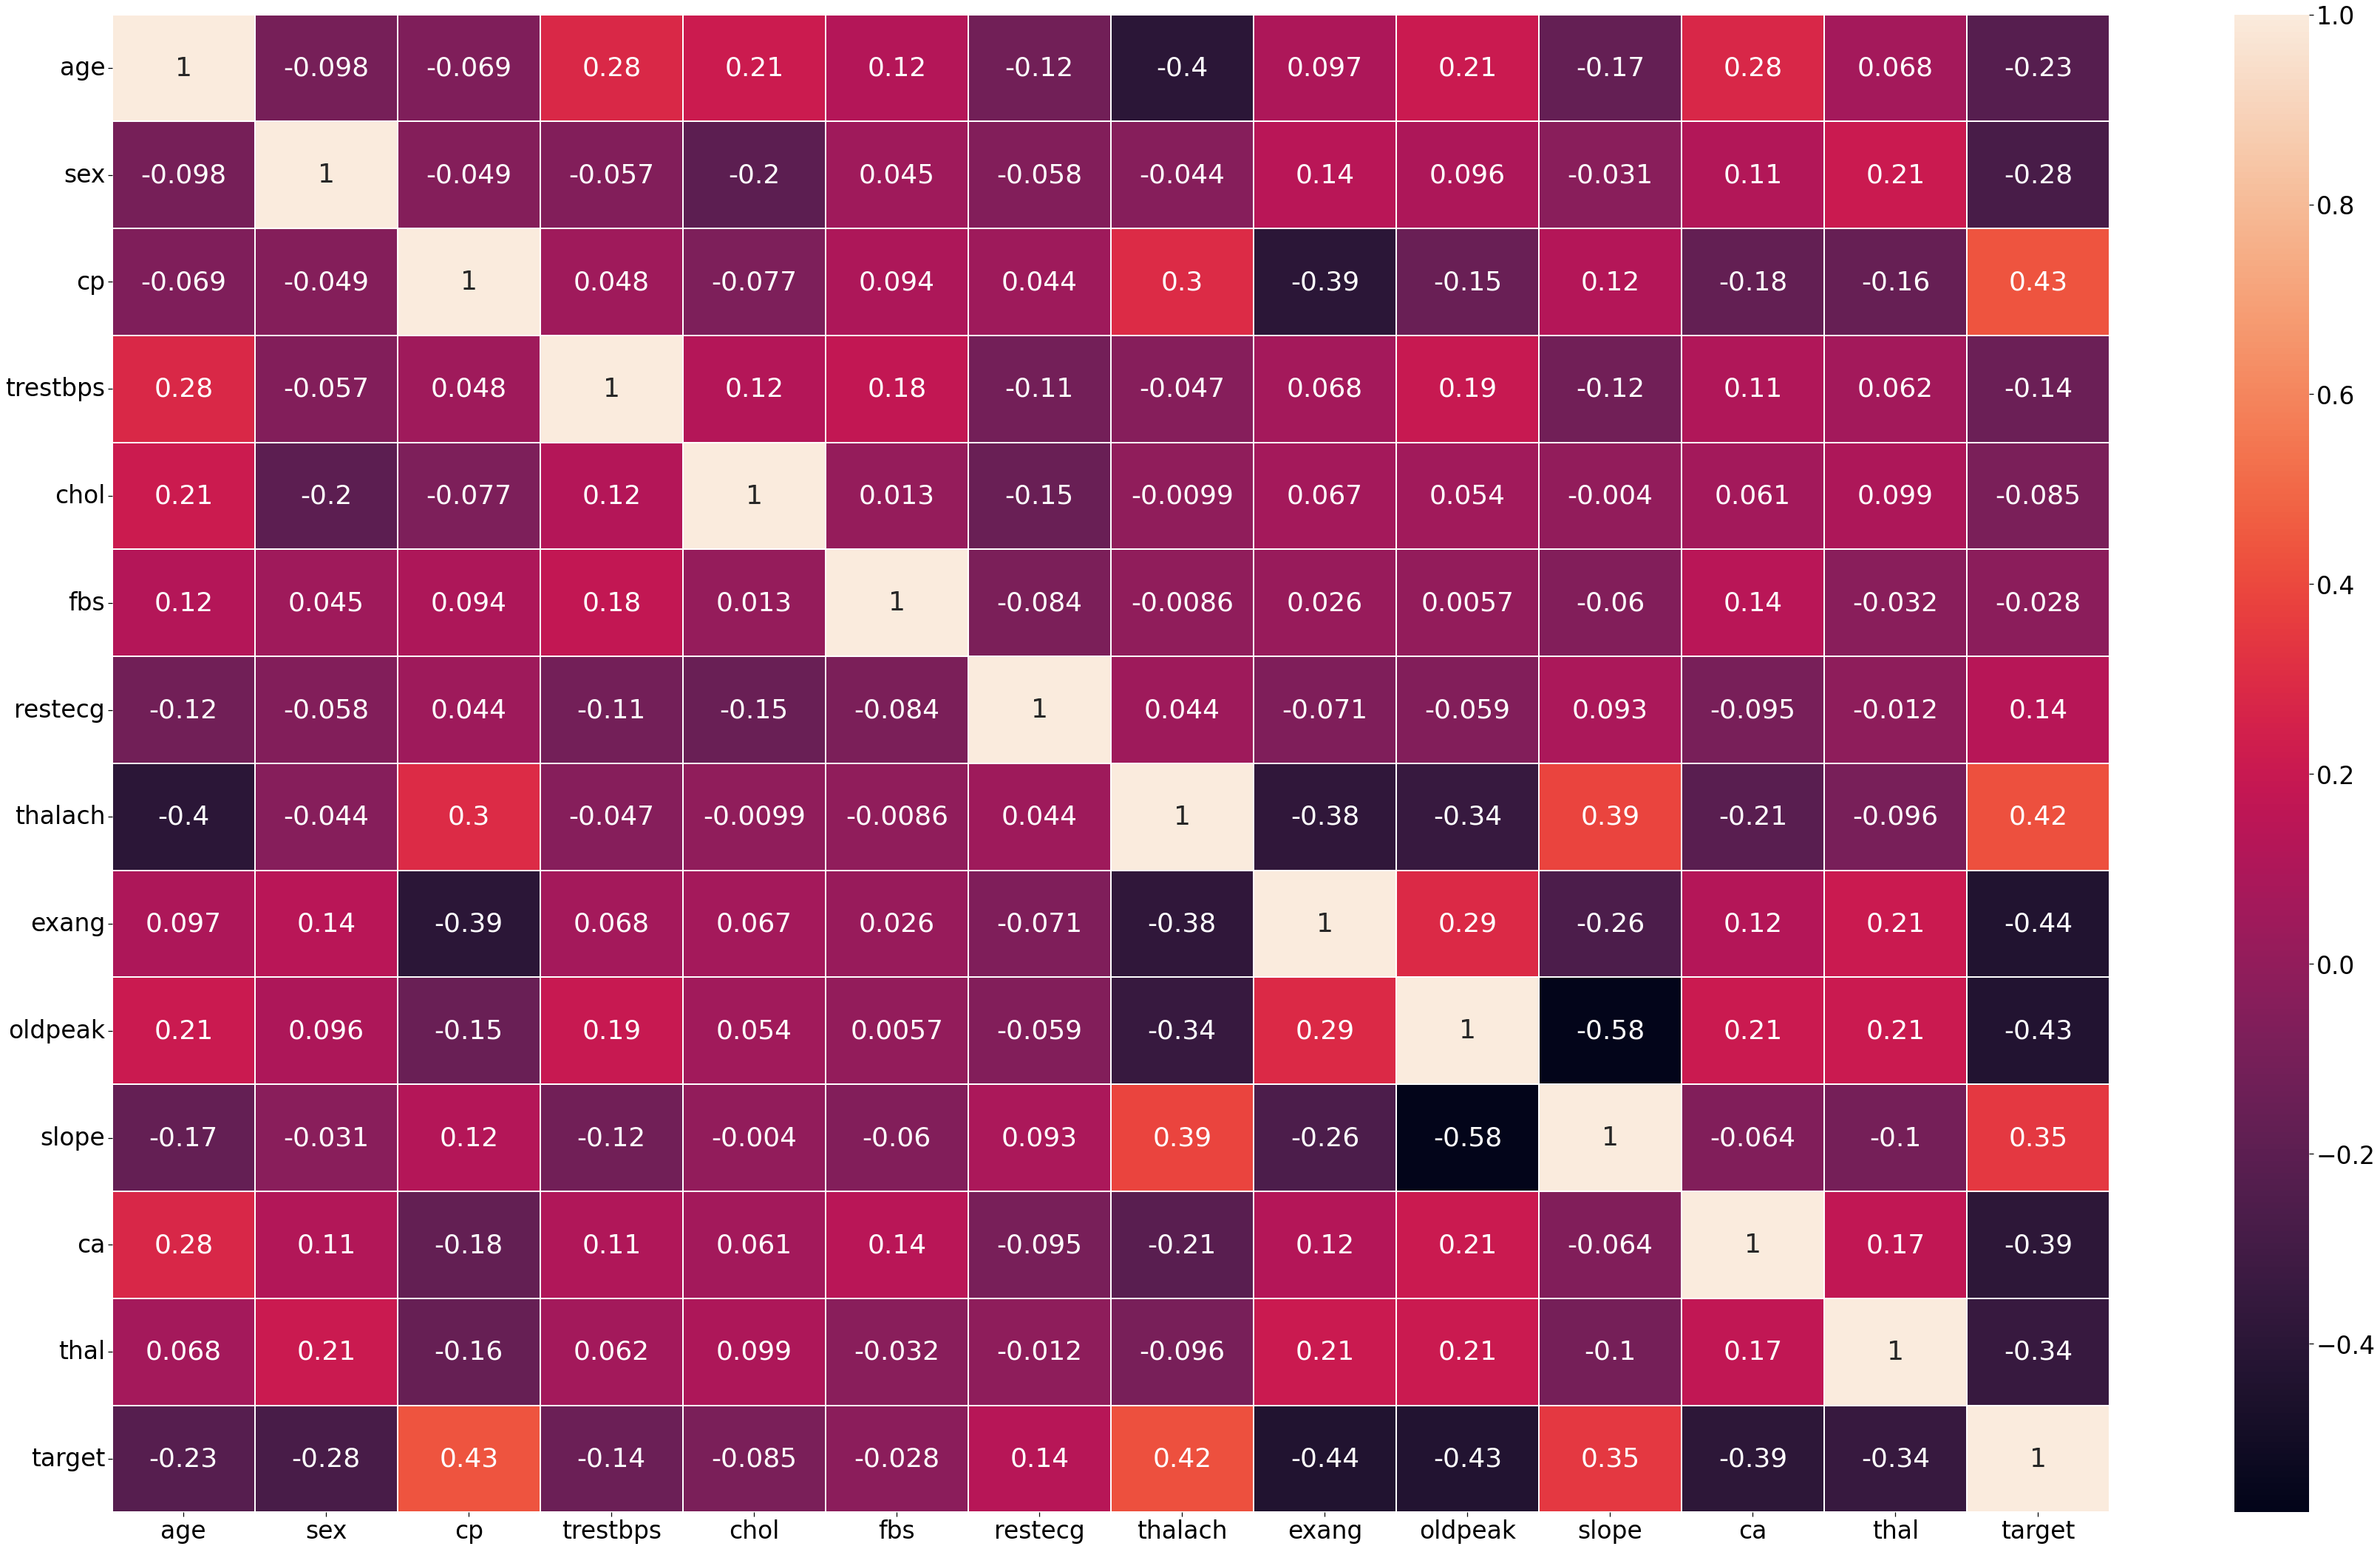

In [14]:
#heat map for the complete dataset
plt.figure(figsize=(50,30))
sns.set_context('notebook', font_scale = 3)
sns.heatmap(dataset.corr(),annot = True, linewidth = 2)
plt.tight_layout()

Here a correlation between the target and other features is analysed.This tells us which feature is negatively correlated and which is positively correlated.

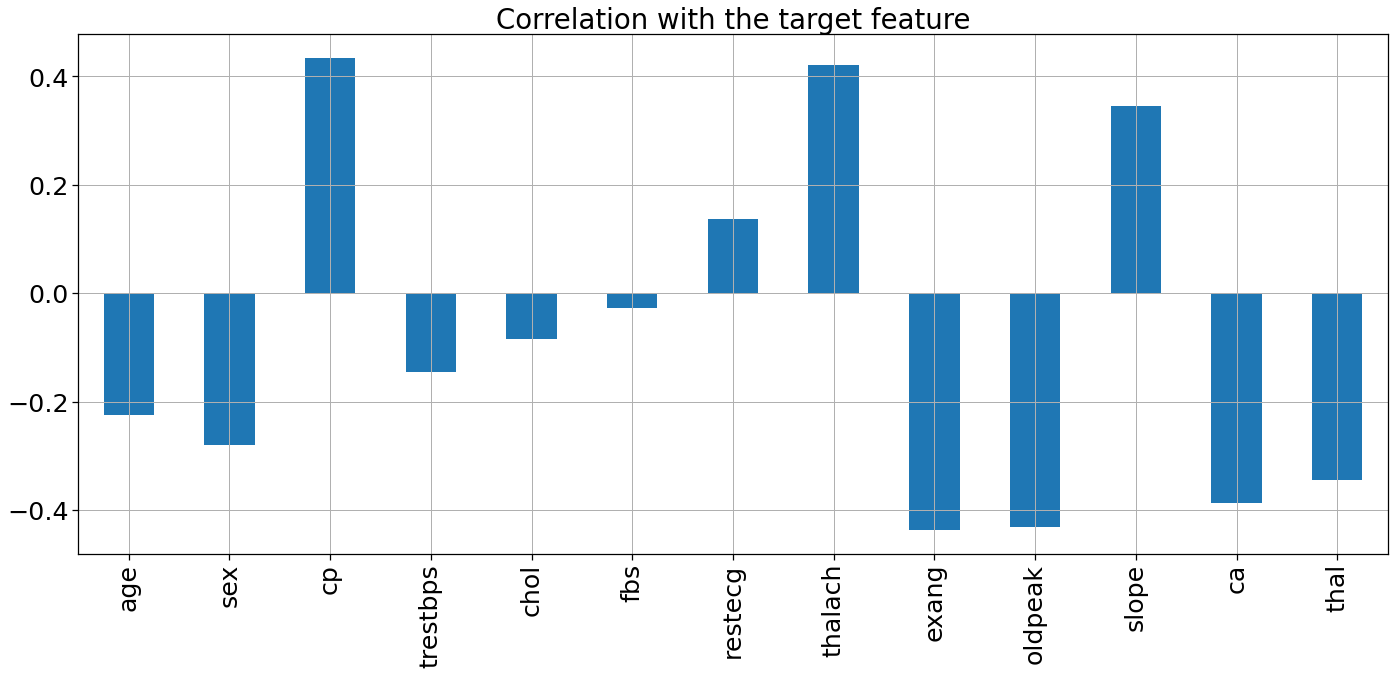

In [15]:
#correlation plot with target feature
sns.set_context('notebook',font_scale = 2.3)
dataset.drop('target', axis=1).corrwith(dataset.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                             title="Correlation with the target feature")
plt.tight_layout()

Here a bar graph for 10 age counts are plotted.Here we can see that the 58 age column has the highest frequency.

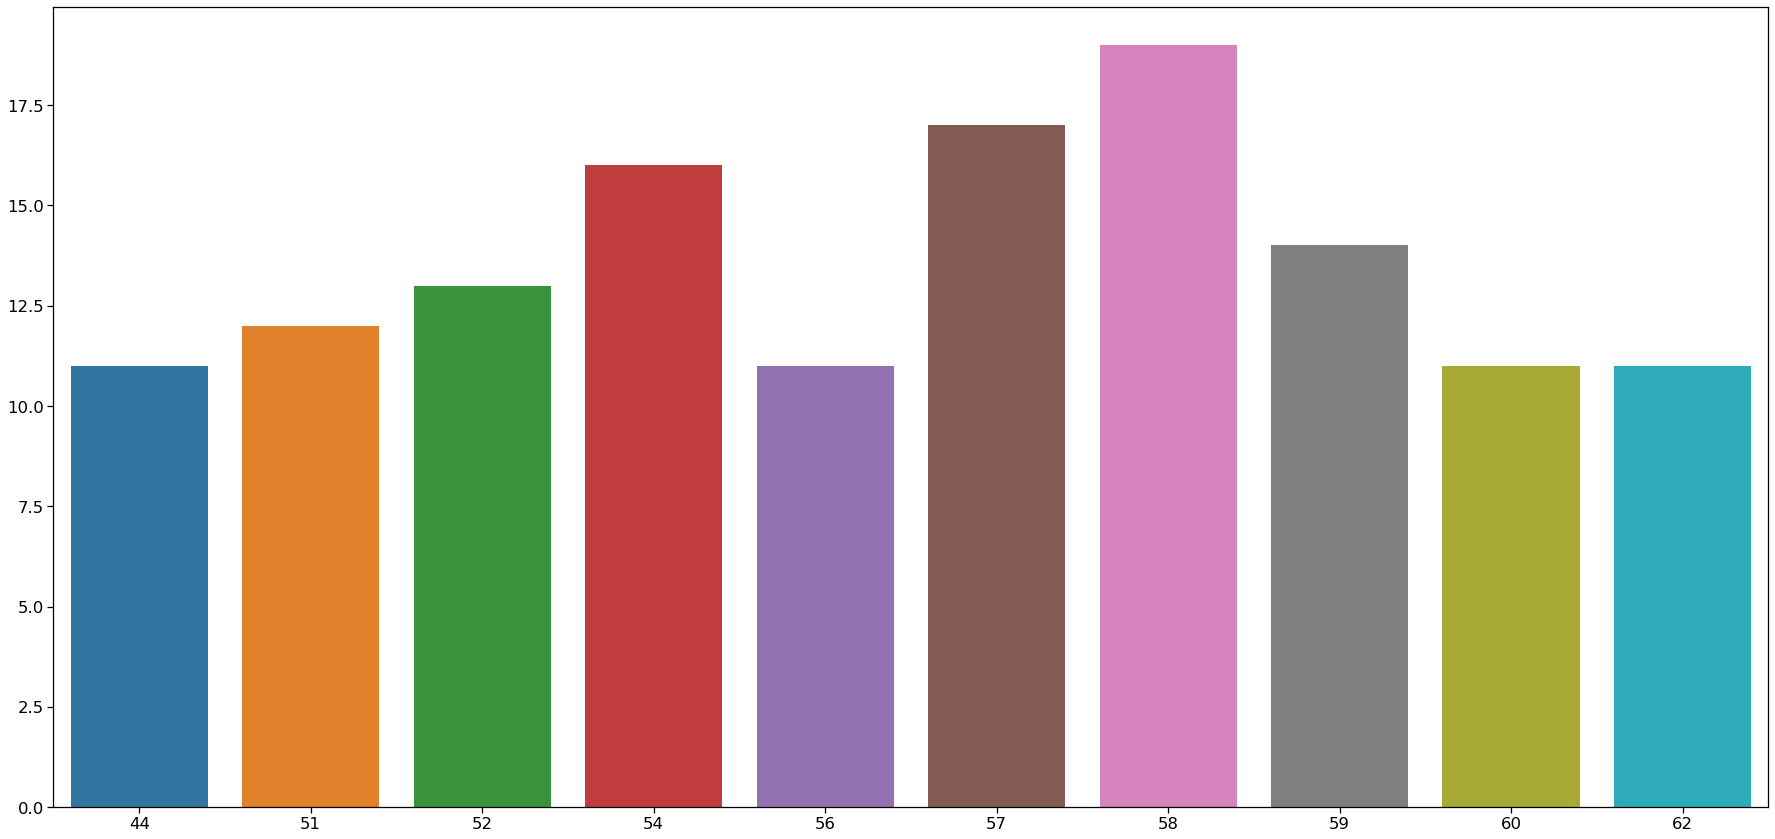

In [16]:
##bar graph for 10 different age values
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=dataset.age.value_counts()[:10].index,y=dataset.age.value_counts()[:10].values)
plt.tight_layout()

Here minimum,maximum and mean age is determined

In [17]:
#determining the maximum, minimum and mean age
minAge=min(dataset.age)
maxAge=max(dataset.age)
meanAge=dataset.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


The age is divided into three category- "young" , "middle" , "elder". Here we can see that elder people are the most affected by heart disease and young ones are the least affected.

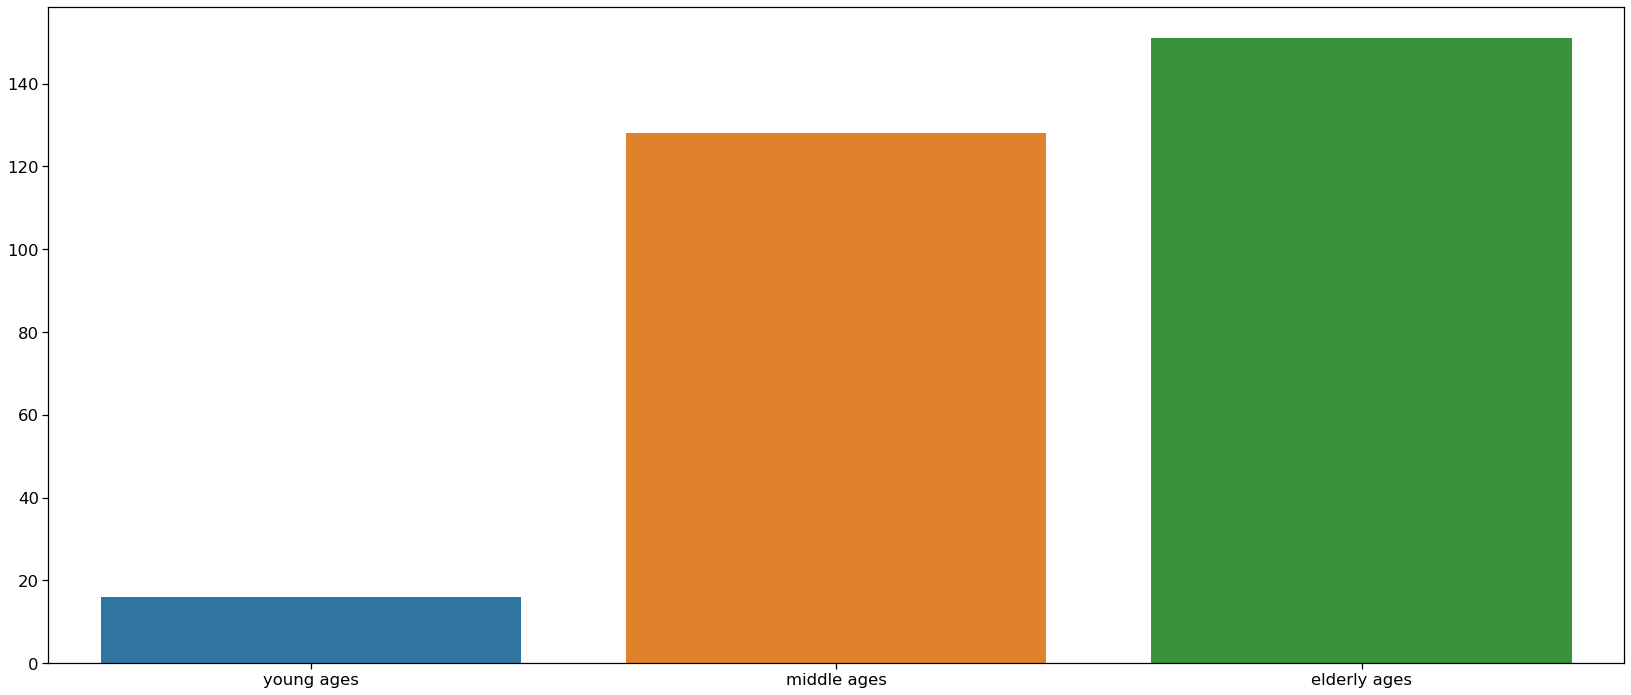

In [18]:
#bar graph for dividing age into young , middle and elder category 
Young = dataset[(dataset.age>=29)&(dataset.age<40)]
Middle = dataset[(dataset.age>=40)&(dataset.age<55)]
Elder = dataset[(dataset.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

To prove the above inference we will plot the pie chart.

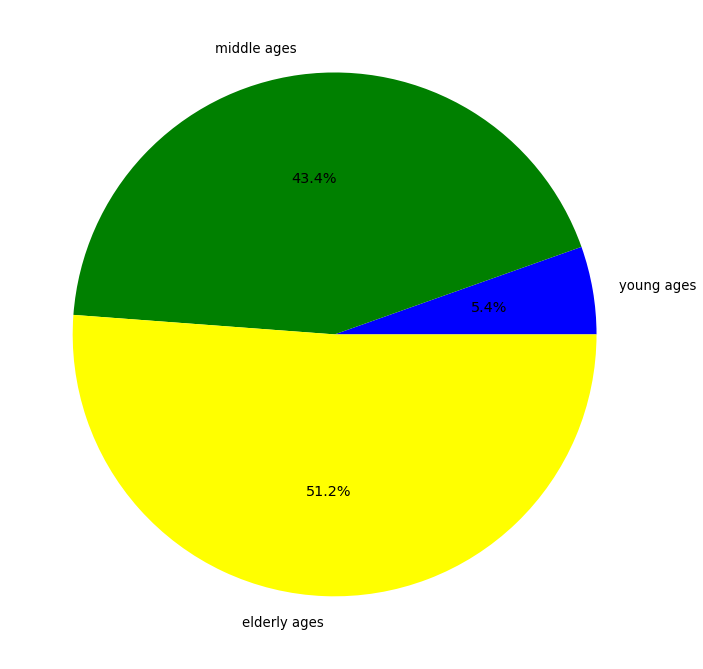

In [19]:
#pie chart for the young, middle and elder age category
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],colors=colors, autopct='%1.1f%%')
plt.tight_layout()

Sex feature analysis.Here it is clearly visible that, Ratio of Male to Female is approx 2:1.

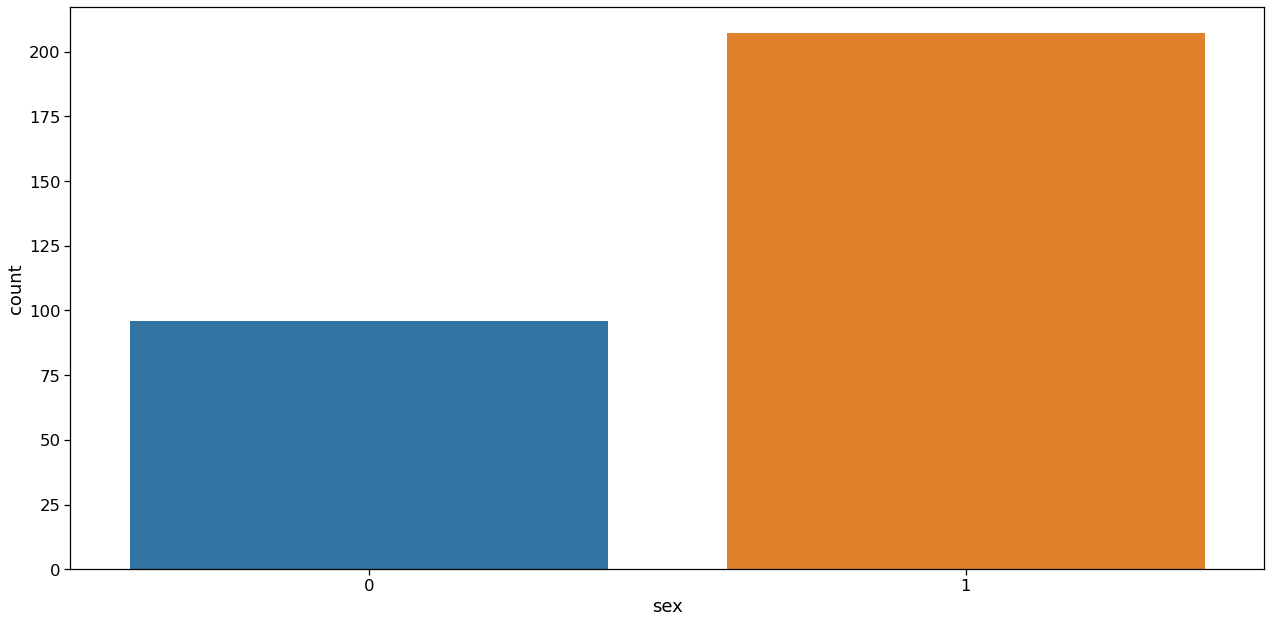

In [20]:
#bar graph for number of males anf females (sex)
plt. figure(figsize=(18,9))
sns.set_context('notebook' , font_scale=1.5)
sns.countplot(dataset['sex'])
plt.tight_layout()

Relation between sex and slope.Here it is clearly visible that the slope value is higher in the case of males(1).

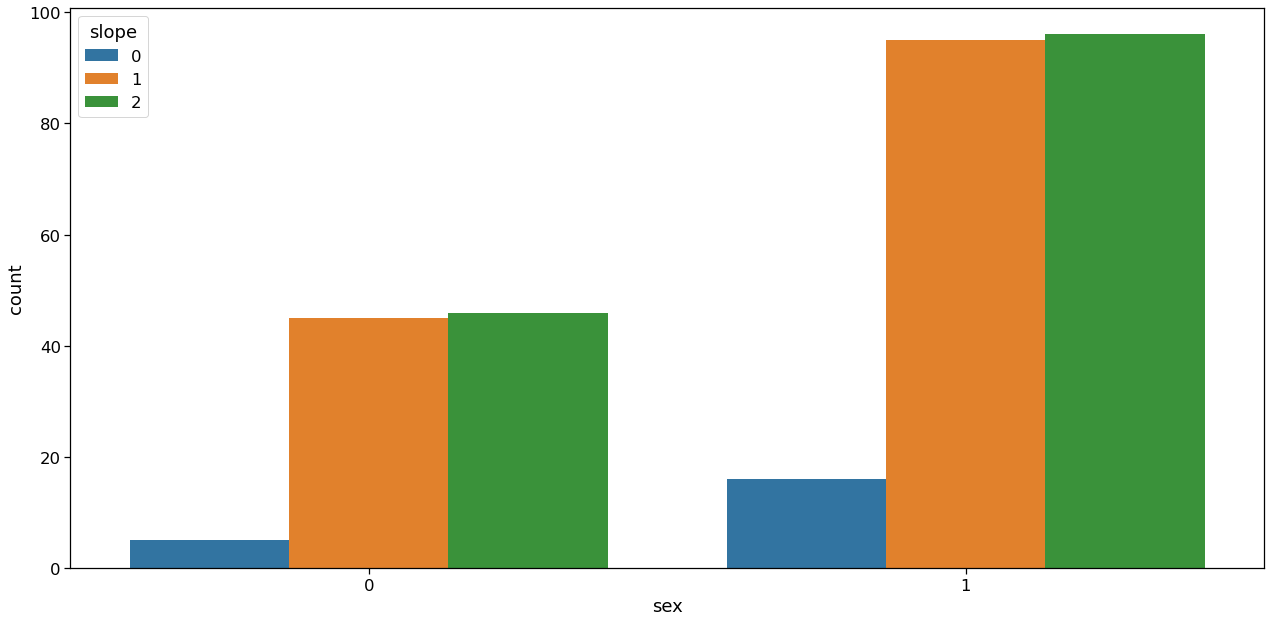

In [21]:
#bar graph relation between sex and slope
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['sex'],hue=dataset["slope"])
plt.tight_layout()

Chest pain analysis ("cp").

As seen, there are 4 types of chest pain
status at least,
condition slightly distressed,
condition medium problem,
condition too bad.

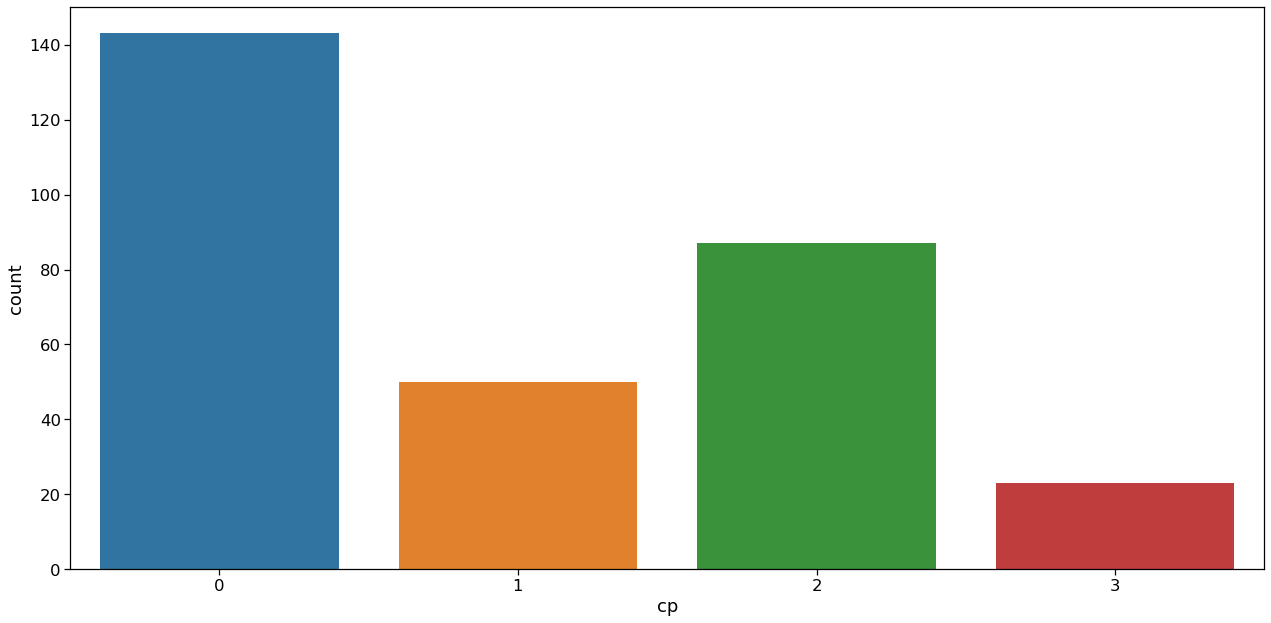

In [22]:
#nar graph analysis for chest pain (cp)
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['cp'])
plt.tight_layout()

Analyzing cp vs target column

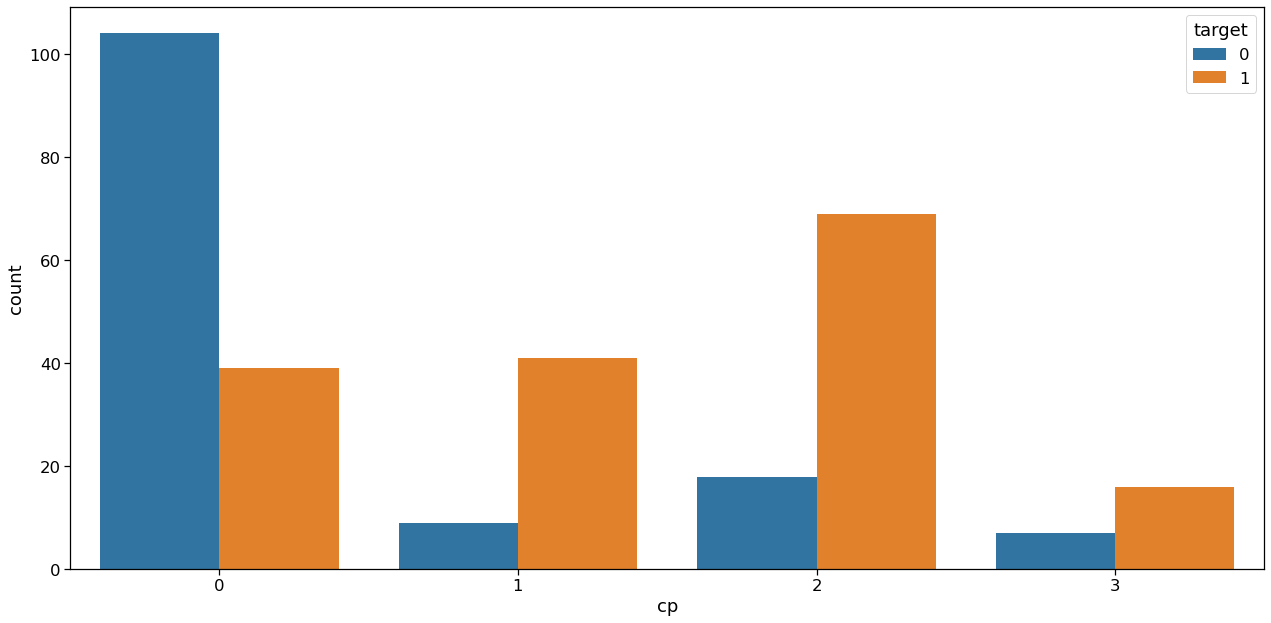

In [23]:
#bar graph relation between vhest pain and target
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['cp'],hue=dataset["target"])
plt.tight_layout()

From the above graph we can make some inferences,
People having the least chest pain are not likely to have heart disease.
People having severe chest pain are likely to have heart disease.
Elderly people are more likely to have chest pain.

Thal Analysis

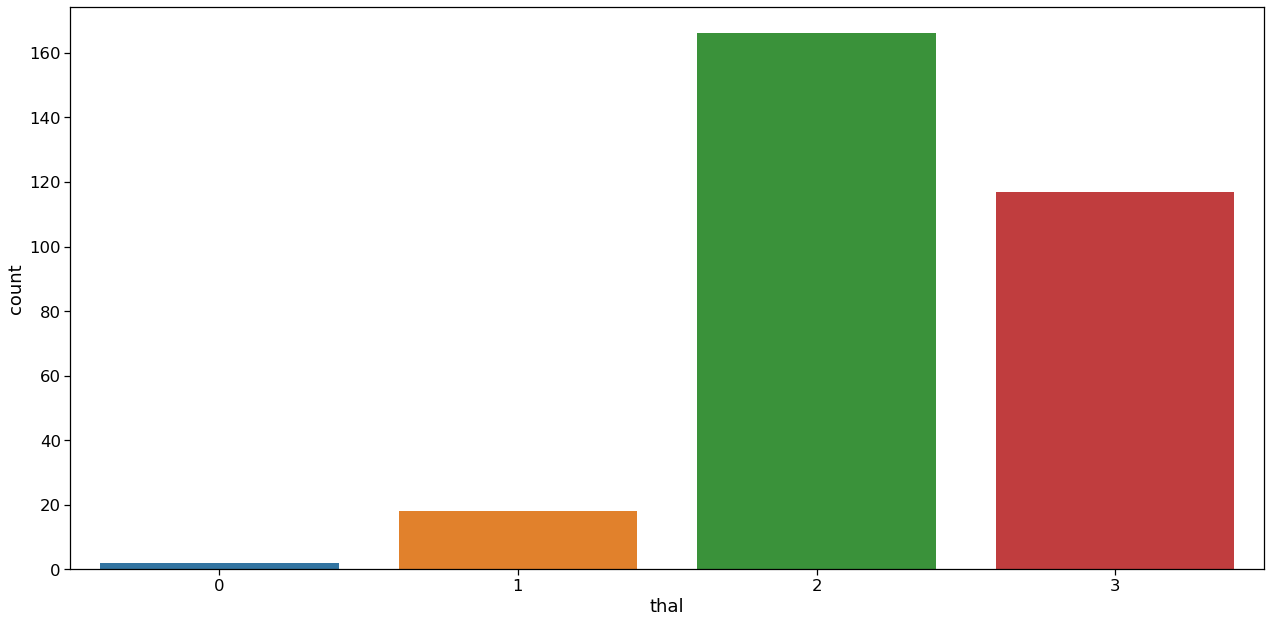

In [24]:
# bar graph analysis for thal
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(dataset['thal'])
plt.tight_layout()

Here a scatter plot between thalach and chol with target as a parameter is plotted 

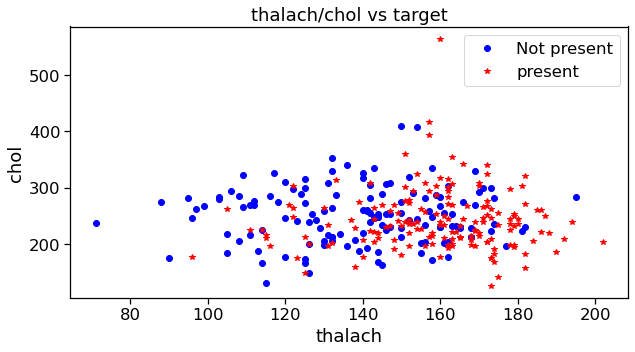

In [25]:
#scatter plot between thalach and age 
abc_zero=dataset[dataset['target']==0].index
abc_one=dataset[dataset['target']==1].index
plt.figure(figsize=(10,5))
plt.title('thalach/chol vs target')
plt.plot(dataset['thalach'][abc_zero],dataset['chol'][abc_zero] , 'bo' , label='Not present')
plt.plot(dataset['thalach'][abc_one],dataset['chol'][abc_one] , 'r*' , label='present')
plt.xlabel('thalach')
plt.ylabel('chol')
plt.legend()
plt.show()

Target analysis

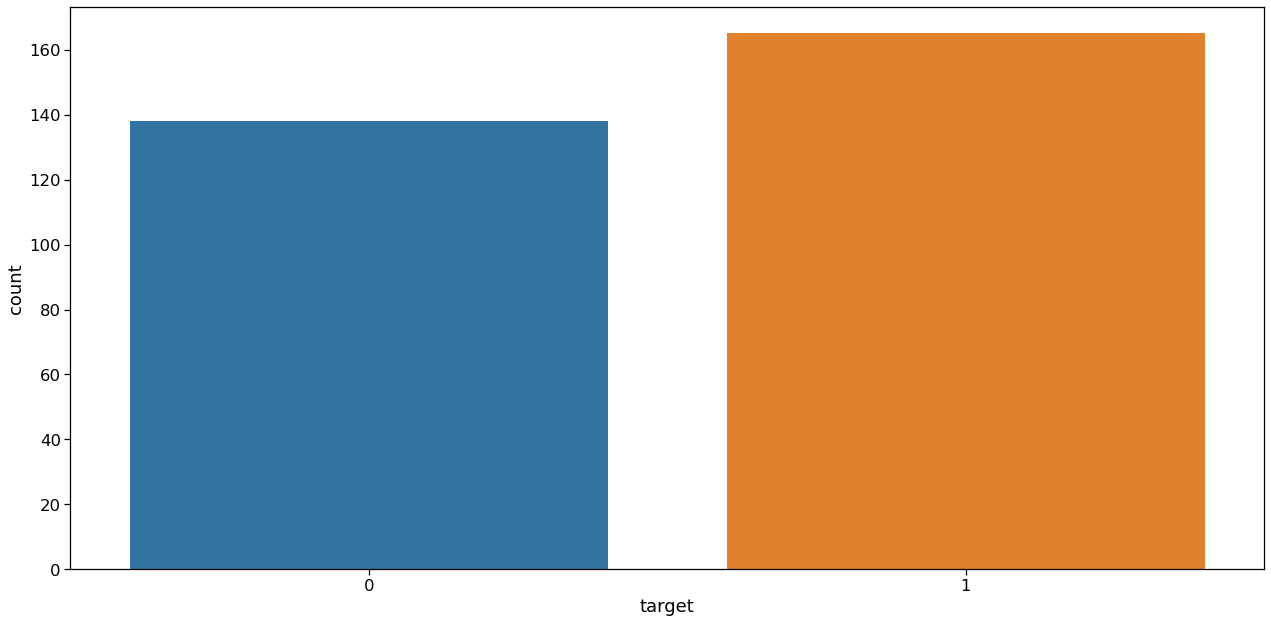

In [26]:
#bar graph analysis for target
plt. figure(figsize=(18,9))
sns.set_context('notebook' , font_scale=1.5)
sns.countplot(dataset['target'])
plt.tight_layout()

The ratio between 1 and 0 is much less than 1.5 which indicates that the target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

Now we will see the complete description of the continuous data as well as the categorical data

In [27]:
#complete description about continuous and categorical data
categorical_val = []
continous_val = []
for column in dataset.columns:
    print("--------------------")
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.To get this done, we use the get_dummies() method from pandas. Next, we need to scale the dataset for which we will use the StandardScaler. The fit_transform() method of the scaler scales the data and we update the columns.

In [28]:
#scaling the dataset
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

The dataset is now ready. We can begin with training our models.The next step is to assign X and y valuse for splittinf the dataset

In [29]:
#declaring the X and y values
X = dataset.drop('target' , axis=1)
y = dataset.target

In [30]:
#printing X
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [31]:
#printing y
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In this project the data is split into 20% for training data and 80% for testing data.

In [32]:
#splitting data for testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

printing X_train values

In [33]:
X_train

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0,thal_1,thal_2,thal_3
74,-1.253580,-0.549641,-0.642843,0.671400,-0.724323,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
153,1.283063,0.821069,0.613313,0.102904,-0.896862,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
64,0.400752,0.478391,-0.681494,0.671400,-0.896862,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
296,0.952197,-0.435415,-0.952051,-0.596784,-0.896862,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
287,0.290464,1.277972,-0.275659,0.627670,-0.896862,0,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-1.253580,0.021488,0.014223,-0.290671,-0.810592,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
192,-0.040403,-0.663867,-1.125980,-1.602586,0.310912,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
117,0.180175,-0.663867,-1.029353,0.540209,0.742260,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
47,-0.812425,0.364165,0.207478,0.277826,-0.896862,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


priting X_test values

In [35]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_4.0,thal_0,thal_1,thal_2,thal_3
225,1.724218,0.763956,-1.396537,-1.077820,1.346147,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
152,1.062485,2.191778,-0.372287,0.234095,-0.379244,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
228,0.511041,2.191778,0.806568,0.409017,-0.724323,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201,0.621330,-0.378302,0.226803,-0.378132,1.518686,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
52,0.841908,-0.092738,-0.294985,-0.159479,0.655990,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-1.143291,-0.778093,-0.082404,-0.028288,-0.638053,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
302,0.290464,-0.092738,-0.198357,1.064975,-0.896862,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
26,0.511041,1.049520,-0.662169,0.321556,0.483451,0,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
108,-0.481558,-0.663867,-0.043753,0.540209,0.052103,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


Support Vector Classifier


This classifier aims at forming a hyperplane that can separate the classes as much as possible by adjusting the distance between the data points and the hyperplane. There are several kernels based on which the hyperplane is decided. I tried four kernels namely, linear, poly, rbf, and sigmoid.

In SVC the default kernel is rbf

In [36]:
#default hyperparameters (rbf)
from sklearn.svm import SVC
svc=SVC()  
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
from sklearn import metrics
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8852459016393442


1) Linear kernel

In [37]:
#linear kernel
svc1=SVC(kernel='linear')
svc1.fit(X_train,y_train)
y_pred=svc1.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.819672131147541


2)RBF kernel

In [38]:
#RBF kernel
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8852459016393442


3)Polynomial Kernel

In [39]:
#polynomial kernel
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8524590163934426


4)Sigmoid kernel

In [40]:
#sigmoid kernel
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8524590163934426


In the next part all the four kernels are taken in a loop and accuracy scores are calculated and stored for plotting the graph

In [41]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Once all the scores are calculated a bar graph for different kernel accuracy scores are plotted

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

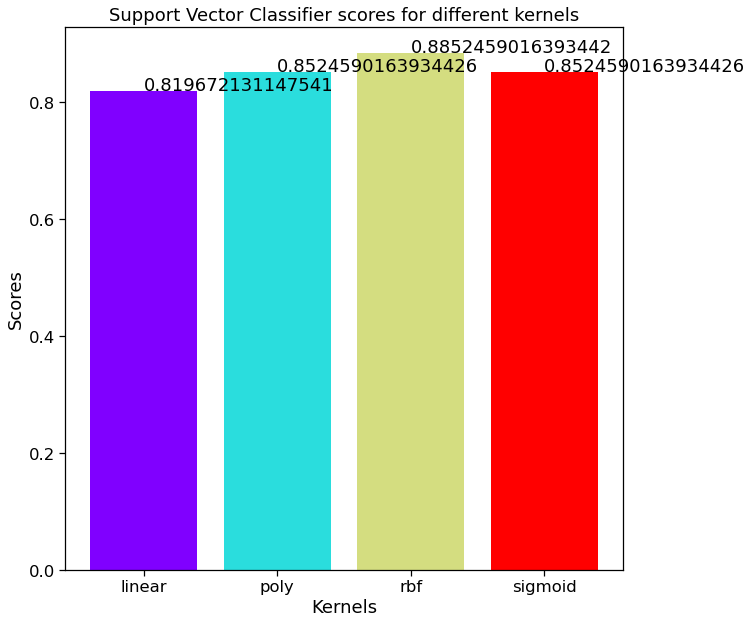

In [42]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

As can be seen from the plot above, the RBF kernel performed the best for this dataset and achieved a score of 88.52%.

Similarly Logistic regression algorithm is applied for the dataset and accuracy scores is calculated

In [43]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8524590163934426


As we can see that from logstic regression an accuracy score of 85.25% is achieved.

For the above logistic regression a confusion matrix is plotted and accuracy is calculated

In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print('Confusion matrix', cm)

Confusion matrix [[22  5]
 [ 4 30]]


From the above confusion matrix we can see that 22 are predicted as true positive(TP), 5 are predicted as false positive(FP), 4 are predicted as false negative(FN) and 30 are predicted as true negative(TN).

From this the accuracy is calculated as = (22+30)/(22+5+4+30).Therefore the final accuracy score is 85.25%.

In [45]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64